**Name:** SIVAKUMAR Srinivas

**EID:** 54486977

**Kaggle Team Name:** Shaata

# CS4487 - Assignment 1 - YouTube Spam Classifier

## Goal
In this assignment, the task is predict whether a comment about a YouTube video is spam or not.  Here are some examples of spam and not spam:
  - **spam**: _"Huh, anyway check out this you[tube] channel: kobyoshi02"_
  - **not spam**: _"Still watching this 2 years later?"_

Your goal is to train a classifier to predict whether a comment is spam or not.


## Methodology
You need to train classifiers using the training data, and then predict on the test data. You are free to choose the feature extraction method and classifier algorithm.  You are free to use methods that were not introduced in class.  You should probably do cross-validation to select a good parameters.


## Evaluation on Kaggle

You need to submit your test predictions to Kaggle for evaluation.  A portion (~50%) of the test data will be used to show your ranking on the live leaderboard.  After the assignment deadline, the remaining portion will be used to calculate your final ranking. The entry with the highest final ranking will win a prize!  Also the top-ranked entries will be asked to give a short 5 minute presentation on what they did.

To submit to Kaggle you need to create an account, and use the competition invitation that will be posted on Canvas.

**Note:** You can only submit 2 times per day to Kaggle!

## What to hand in
You need to turn in the following things:

1. This ipynb file `Assignment1.ipynb`, containing your source code and documentation. _**You should write about all the various attempts that you make to find a good solution.**_
2. Your final submission file to Kaggle.
3. The ipynb file `Assignment1-Final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle.  **This code will be used to verify that your Kaggle submission is reproducible.**

Files should be uploaded to Assignment 1 on Canvas.

## Grading
The marks of the assignment are distributed as follows:
- 40% - Results using various classifiers and feature representations.
- 20% - Trying out feature representations (e.g. adding additional features) or classifiers not used in the tutorials.
- 20% - Quality of the written report.  More points for insightful observations and analysis.
- 20% - Final ranking on the Kaggle test data (private leaderboard). If a submission cannot be reproduced by the submitted code, it will not receive marks for ranking.
- **Late Penalty:** 25 marks will be subtracted for each day late.

**Note:** you should start early! Some classifiers may take a while to train.
<hr>

# Load the Data

The training data is in the text file `youtube_spam_train.csv`.  This CSV file contains the comment text, comment author names, date, video IDs, and classes. The class labels are: `0` for "not spam", and `1` for "spam". 

The testing data is in the text file `youtube_spam_test.csv`, and includes everything except the class labels. 

Note that the data is in chronological order -- the dates of the training data precede the dates of the test data.  This is to make the experiment more like a real situation, where we collect data up to a certain time to train the models, and then test on the new incoming data.

Besides the comment text, you can also use the author names, video names, or dates to build your classifier.

To submit to Kaggle, you need to generate a Kaggle submission files, which is CSV file with the following format: 

<pre>
Id,Prediction
1,0
2,1
3,1
4,0
...
</pre>

Here are some helpful code to get you started reading the data and writing the Kaggle submission file.

In [1]:
%matplotlib inline
import sys
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import csv

# /home/elft18/ssivakuma2/.local/lib/python3.5/site-packages
# sys.path.insert(0, "/home/elft18/ssivakuma2/.local/lib/python3.5/site-packages")
print(sys.path)
import pandas as pd

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/home/elft18/ssivakuma2/.local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/elft18/ssivakuma2/.ipython']


In [2]:
# function to write a CSV file for Kaggle submission
def write_csv_kaggle_sub(fname, Y):
    # fname = file name
    # Y is a list/array with class entries
    with open(fname, 'w') as f:
        writer = csv.writer(f)

        # header
        tmp = ['Id', 'Prediction']            
        writer.writerow(tmp)
    
        # add ID numbers for each Y, and usage if necessary
        for (i,y) in enumerate(Y):
            tmp2 = [(i+1), y]
            writer.writerow(tmp2)
        
        f.close()

The below code will load the training and test sets.

In [3]:
# load the data with pandas
traindf = pd.read_csv('youtube_spam_train.csv')
testdf  = pd.read_csv('youtube_spam_test.csv')

# extract data into a dictionary

train = {}                                 ### training data
train['txt']   = list(traindf['TEXT'])     # comment text
train['class'] = list(traindf['CLASS'])    # class (0=not spam; 1=spam)
train['author'] = list(traindf['AUTHOR'])  # author name
train['video']  = list(traindf['VIDEO'])   # video ID
train['date']   = list(traindf['DATE'])    # date of the comment

test = {}                                  ### testing data
test['txt']   = list(testdf['TEXT'])
test['author'] = list(testdf['AUTHOR'])
test['video']  = list(testdf['VIDEO'])
test['date']    = list(testdf['DATE'])

print(len(train['txt']))
print(len(test['txt']))



1000
956


Here is an example to write a csv file with some predictions on the test set.

In [4]:
# write your predictions on the test set
predY = zeros(len(test['txt'])) # for example, predict all 0
write_csv_kaggle_sub("my_submission.csv", predY)

Look at the first 10 samples in the training data:

In [5]:
for t in range(10):
    print("=== Class={}, Video={}, Author={}, Date={}".format( 
        train['class'][t], train['video'][t], 
        train['author'][t], train['date'][t]))
    print(train['txt'][t])

=== Class=0, Video=pRpeEdMmmQ0, Author=Latin Bosch, Date=2013-07-12T22:33:27.916000
Shakira is the best dancer
=== Class=0, Video=pRpeEdMmmQ0, Author=Aishlin Maciel, Date=2013-07-13T11:17:52.308000
Shakira u are so wiredo
=== Class=0, Video=pRpeEdMmmQ0, Author=jeffrey jules, Date=2013-07-13T12:09:31.188000
wow
=== Class=0, Video=pRpeEdMmmQ0, Author=Sabina Pearson-Smith, Date=2013-07-13T13:14:30.021000
I love this song for two reasons: 1.it is about Africa 2.i was born in beautiful south Africa
=== Class=0, Video=pRpeEdMmmQ0, Author=Katie Mettam, Date=2013-07-13T13:27:39.441000
I love this song because we sing it at Camp all the time!!
=== Class=0, Video=pRpeEdMmmQ0, Author=Dinova Sharon, Date=2013-07-13T14:44:00.700000
well done shakira
=== Class=0, Video=pRpeEdMmmQ0, Author=TheHotChocolate, Date=2013-07-13T18:26:37.017000
she is sooooo beautiful!
=== Class=0, Video=pRpeEdMmmQ0, Author=Ysobel Schofield, Date=2013-07-13T20:17:25.181000
Waka waka she rules
=== Class=1, Video=pRpeEdMmmQ0,

# YOUR CODE and DOCUMENTATION HERE

# Initial Plan
Initial thought is to use a similar approach to classifying spam email using TF-IDF.  
This may work but a logistic regression algorithm may work better. The primary consideration along with creating the vocabulary
is to take some other features into consideration. For example if the author name is in the comment it is most likely spam
A lot of punctuation could also mean the same. The vocabulary size is something that could affect the classifer a lot. 
Generally comments are short, but sometimes there are detailed reviews and youtube does not have a character limit.

As expected, the first try with only TF-IDF based on the text did not work well. Accuracy of 0.83 observed. Need to take other
data into consideration, for example number of characters and maybe punctuations and author name. 2nd try will move to a 
logistic regression algorithm. The problem with bag of words is that the order isn't considered, need to figure out a way to 
take the structure of sentences into consideration.

# Text Preprocessing

- Convert URLs using regex method
- Lemmatization:
    -> Many words appear in an inflected form, that is in different grammatical tones and tenses.
    -> Lemmatization is the process of converting these inflected words into their base form. For example, the words 'walked','walking can be converted to the base form 'walk'
    
I also decided to work on the pandas dataframe itself instead of the lists, so that I could use a pipeline which will be explained below



In [6]:
import nltk
import re
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def replace_url_in_doc(doc):
    doc = re.sub('(/^(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)*\/?$/)', 'URL', doc)
    return re.sub('(/^(www\.[^\s]+)|(https?://[^\s]+))','URL', doc) 

for i in range(len(traindf['TEXT'])):
    text = traindf['TEXT'][i]
    text = replace_url_in_doc(text)
    words = text.split()
    text = ''
    for j in words:
        if(text == ''):
            text += wordnet_lemmatizer.lemmatize(j.lower(),pos='v')
        else:
            text = text +' '+wordnet_lemmatizer.lemmatize(j.lower(),pos='v')
    traindf['TEXT'][i] = text 
    
for i in range(len(testdf['TEXT'])):
    text = testdf['TEXT'][i]
    text = replace_url_in_doc(text)
    words = text.split()
    text = ''
    for j in words:
        if(text == ''):
            text += wordnet_lemmatizer.lemmatize(j.lower(),pos='v')
        else:
            text = text +' '+wordnet_lemmatizer.lemmatize(j.lower(),pos='v')
    testdf['TEXT'][i] = text
    


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/elft18/ssivakuma2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I wanted to add more features to my classifier as mentioned above. After some research, I found out that the best way to do this would be to use a Pipeline and use gridsearchCV to optimize the results. Pipelines allow us to fit and trasform the data as many times as we want, within the same classifier. Using pipeline, we can also use GridSearchCV to find the optimum value for each step. I also used FeatureUnion to group some features together. I passed the pandas dataframe to the Pipeline because I wanted to extract some additional features like the author name.

Below are some custom transformers I have written to help with my classifiers. The features I have considered are as follows :
- Bag of Words vocabulary
- Length of text
- Check if the author's name is present in the comment
- number of punctuations. This feature is scaled by dividing by the length of the string

In [7]:
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import string
import numpy as np
class ColumnExtractor(BaseEstimator,TransformerMixin):

    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xcols = X[self.cols]
        return Xcols
    
class ConvertToList(BaseEstimator,TransformerMixin):
    
    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xlist = X.values.tolist()
        return Xlist

class LengthTransformer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        # stateless transformer
        return self
    def transform(self,X):
        #X is a list
        array = []
        for t in X:
            array.append(len(t))
        return np.array(array).reshape(-1,1)

class AuthorTransformer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        # stateless transformer
        return self
    def transform(self,X):
        #X is a pandas df with two fields, 'TEXT' and 'AUTHOR'
        array = []
        AuthorList = list(X['AUTHOR'])
        CommentList = list(X['TEXT'])
        for i in range(len(AuthorList)):
            flag = True
            words = AuthorList[i].split()
            for word in words:
                if word in CommentList[i]:
                    flag = False
                    array.append(True)
                    break
            if flag:
                array.append(False)
        return np.array(array).reshape(-1,1)
class PunctuationTransformer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        # stateless transformer
        return self
    def transform(self,X):
        count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
        array = []
        for t in X:
            array.append(count(t, string.punctuation))
        return np.array(array).reshape(-1,1)
        

In [8]:
from sklearn.pipeline import *

classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('vectorizer', feature_extraction.text.CountVectorizer(stop_words='english', max_features=1400)),
            ('tfidf', feature_extraction.text.TfidfTransformer(norm='l1'))
        ])),
        ('essay_length', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('length',LengthTransformer())# not using standardScaler() because that would provide negative values
        ])),
        ('author_name',  Pipeline([
            ('extract',ColumnExtractor(['TEXT','AUTHOR'])),
            ('author',AuthorTransformer())
        ])),
        ('punctuations',  Pipeline([
            ('extract',ColumnExtractor(['TEXT'])),
            ('convert',ConvertToList()),
            ('punctuations',PunctuationTransformer())
        ]))
    ])),
    ('classifier',naive_bayes.MultinomialNB())
])
parameters = {'classifier__alpha':logspace(-5,0,50),'features__text__vectorizer__max_features':linspace(1000,5000,15,dtype = int),\
              'features__text__tfidf__use_idf':[True,False]
              }
gs_clf = GridSearchCV(classifier, parameters, cv=5, n_jobs = 20, iid=False,refit = True,verbose=1)
gs_clf = gs_clf.fit(traindf,train['class'])




Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    2.1s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    4.1s
[Parallel(n_jobs=20)]: Done 1480 tasks      | elapsed:    7.1s
[Parallel(n_jobs=20)]: Done 2380 tasks      | elapsed:   10.7s
[Parallel(n_jobs=20)]: Done 3480 tasks      | elapsed:   15.3s
[Parallel(n_jobs=20)]: Done 4780 tasks      | elapsed:   20.3s
[Parallel(n_jobs=20)]: Done 6970 tasks      | elapsed:   27.5s
[Parallel(n_jobs=20)]: Done 7500 out of 7500 | elapsed:   29.1s finished


0.8689985999649992
{'classifier__alpha': 0.009102981779915217, 'features__text__tfidf__use_idf': False, 'features__text__vectorizer__max_features': 2142}


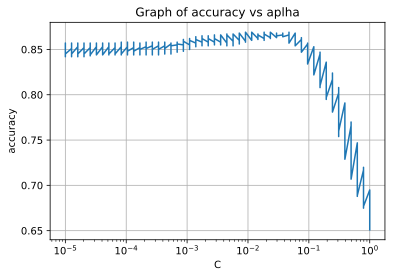

In [9]:
print(gs_clf.best_score_ )
print(gs_clf.best_params_)
allAlpha = []
allVocabSize = []
allscores = []
for m,p in zip(gs_clf.cv_results_['mean_test_score'], gs_clf.cv_results_['params']):
    allAlpha.append(p['classifier__alpha'])
    allVocabSize.append(p['features__text__vectorizer__max_features'])
    allscores.append(m)

plt.figure()
plt.semilogx(allAlpha, allscores)
plt.xlabel('C'); plt.ylabel('accuracy')
plt.title('Graph of accuracy vs aplha')
plt.grid(True)

Output For Multinomial Naive Bayes

In [10]:
predY = gs_clf.predict(testdf)
write_csv_kaggle_sub("NB.csv", predY)

Naive Bayes did not perform well, obtained a best result of 0.836 on Kaggle. Next step to try LR and SVM

In [11]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import *
from sklearn.pipeline import *

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
logregPipeline = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('vectorizer', feature_extraction.text.CountVectorizer(stop_words='english', max_features=1400))
        ])),
        ('essay_length', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('length',LengthTransformer()),
            ('scaler',StandardScaler())
        ])),
        ('author_name',  Pipeline([
            ('extract',ColumnExtractor(['TEXT','AUTHOR'])),
            ('author',AuthorTransformer())
        ])),
        ('punctuations',  Pipeline([
            ('extract',ColumnExtractor(['TEXT'])),
            ('convert',ConvertToList()),
            ('punctuations',PunctuationTransformer()),
            ('scaler',StandardScaler())
        ]))
    ])),
    ('class',linear_model.LogisticRegression(C=100))
])
paramgrid = {'class__C': logspace(-4,4,20),'features__text__vectorizer__max_features':linspace(500,5000,15,dtype = int),\
        'features__text__vectorizer__ngram_range':((1, 4),(1,2),(1,3),(1,1))}
logreg = model_selection.GridSearchCV(logregPipeline, paramgrid, cv=5,
                                      n_jobs = -1, verbose=1)
logreg.fit(traindf, traindf['CLASS'])


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 2258 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 3008 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 3858 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 4808 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   49.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(memory=None,
     steps=[('extract', ColumnExtractor(cols='TEXT')), ('convert', ConvertToList()), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'class__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1...35, 4357, 4678, 5000]), 'features__text__vectorizer__ngram_range': ((1, 4), (1, 2), (1, 3), (1, 1))},
       pre_dispatch='2*n_jobs', refit=True, return_tr

0.944
{'class__C': 11.288378916846883, 'features__text__vectorizer__max_features': 500, 'features__text__vectorizer__ngram_range': (1, 4)}


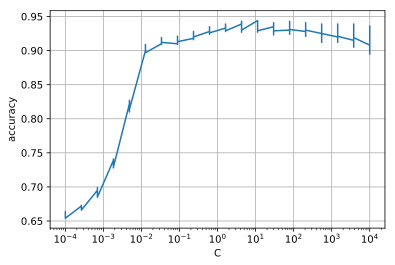

In [12]:
print(logreg.best_score_)
print(logreg.best_params_)
allC = []
allFeatures =[]
allscores = []
for m,p in zip(logreg.cv_results_['mean_test_score'], logreg.cv_results_['params']):
    allC.append(p['class__C'])
    allFeatures.append(p['features__text__vectorizer__ngram_range'])
    allscores.append(m)

plt.figure()
plt.semilogx(allC, allscores)
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)

Output to file

In [13]:
predY = logreg.predict(testdf)
write_csv_kaggle_sub("LR.csv", predY)

Trying SVM with a Pipeline

In [14]:
classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('vectorizer', feature_extraction.text.CountVectorizer(stop_words='english', max_features=1400))
        ])),
        ('essay_length', Pipeline([
            ('extract',ColumnExtractor('TEXT')),
            ('convert',ConvertToList()),
            ('length',LengthTransformer()),
            ('scaler',StandardScaler())
        ])),
        ('author_name',  Pipeline([
            ('extract',ColumnExtractor(['TEXT','AUTHOR'])),
            ('author',AuthorTransformer())
        ])),
        ('punctuations',  Pipeline([
            ('extract',ColumnExtractor(['TEXT'])),
            ('convert',ConvertToList()),
            ('punctuations',PunctuationTransformer()),
            ('scaler',StandardScaler())
        ]))
    ])),
    ('class',svm.SVC(kernel='linear', C=2))
])
paramgrid = {'class__C': logspace(-3,3,13),'features__text__vectorizer__max_features':linspace(500,5000,15,dtype = int),\
            'features__text__vectorizer__ngram_range':((1, 4),(1,2),(1,3),(1,1))}
svmcv = model_selection.GridSearchCV(classifier, paramgrid, cv=3,
                                    n_jobs = -1, verbose=1)
svmcv.fit(traindf, traindf['CLASS'])


Fitting 3 folds for each of 780 candidates, totalling 2340 fits


[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 2340 out of 2340 | elapsed:   20.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(memory=None,
     steps=[('extract', ColumnExtractor(cols='TEXT')), ('convert', ConvertToList()), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'class__C': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03]), 'features__text__vectorizer__max_features': array([ 500,  821, 1142, 1464, 1785, 2107, 2428, 2750, 3071, 3392, 3714,
       4035, 4357, 4678, 5000]), 'features__text__vectorizer__ngram_range': ((1, 4), (1, 2), (1, 3), (1, 1))},
       pre_dis

{'class__C': 1.0, 'features__text__vectorizer__max_features': 2428, 'features__text__vectorizer__ngram_range': (1, 2)}
0.936


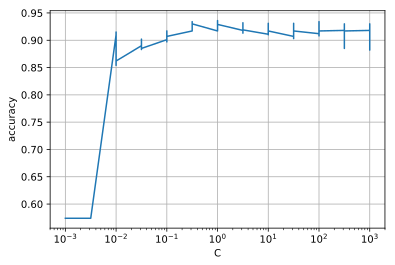

In [15]:
print(svmcv.best_params_)
print(svmcv.best_score_)
allC = []
allscores = []
for m,p in zip(svmcv.cv_results_['mean_test_score'], svmcv.cv_results_['params']):
    allC.append(p['class__C'])
    allscores.append(m)

plt.figure()
plt.semilogx(allC, allscores)
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)

In [16]:
predY = svmcv.predict(testdf)
write_csv_kaggle_sub("svm.csv", predY)

# Summary

Explored new text classification features by implementing lemmatization and replacing URLs.

Pipeline and FeatureUnion allowed me to include multiple features into the classifier. Besides the Bag of Words model, the length of text is an important feature. Moreover Pipeliness allowed for much more clean code.

I also learnt how to from my own custom transformers to fit and trasform data.

Overall, the best result was from the Logistic Regression classifier, after cross validation. SVM performed around the same. TF-IDF feature provided worse results
